**Here is the workflow for admission prediction by using sklearn linear regression model (with [dataset](<https://www.kaggle.com/mohansacharya/graduate-admissions>) from kaggle)**
* Data loading, cleaning and visualization.
* Data preprocessing. Including data shuffle and splitting train, validation and test dataset.
* Train model and visualize result for each features.
* Compare and find the best model.

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import os

**Data loading, cleaning and visualizaton.**

In [2]:
data = pd.read_csv("./input/Admission_Predict.csv")

In [3]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
data.shape

(400, 9)

In [5]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [6]:
def list_coloumns_have_nan_values(data):
    return data.columns[data.isna().any()].tolist()

In [7]:
list_coloumns_have_nan_values(data)

[]

In [8]:
data.columns = ['serial_num', 'gre_score', 'tofel_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research', 'chance']

In [9]:
data.apply(lambda s: data.corrwith(s))

,serial_num,gre_score,tofel_score,university_rating,sop,lor,cgpa,research,chance
serial_num,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
gre_score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
tofel_score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
university_rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
sop,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
lor,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
cgpa,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
chance,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [10]:
feature_cols = ['gre_score', 'tofel_score', 'university_rating', 'sop', 'lor', 'cgpa', 'research']
target_col = "chance";

In [11]:
data.columns

Index(['serial_num', 'gre_score', 'tofel_score', 'university_rating', 'sop',
       'lor', 'cgpa', 'research', 'chance'],
      dtype='object')

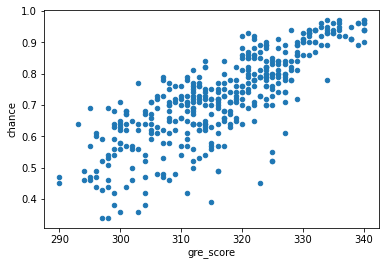

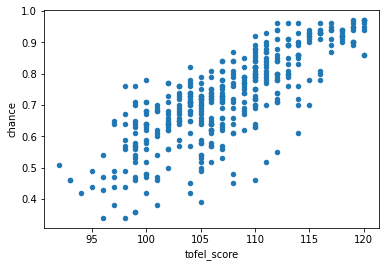

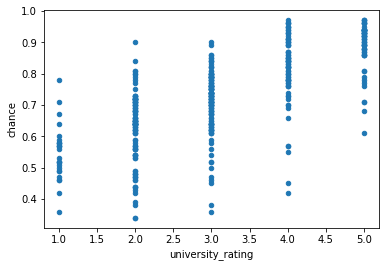

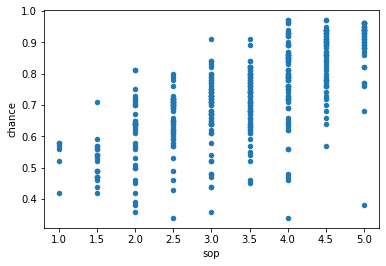

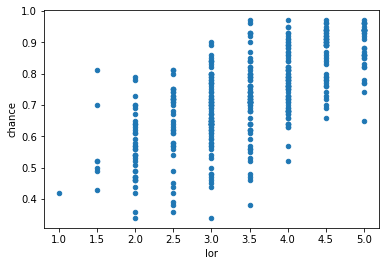

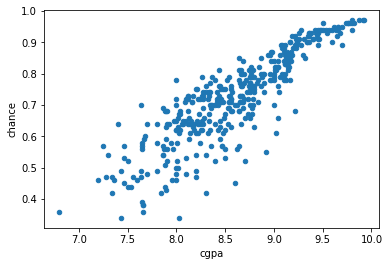

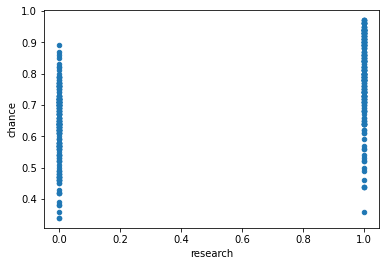

In [12]:
for f in feature_cols:
    data.plot.scatter(x=f, y=target_col);

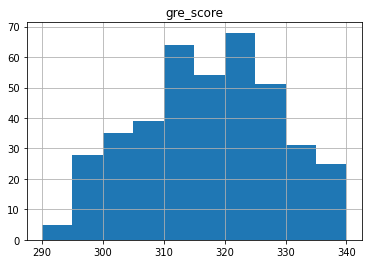

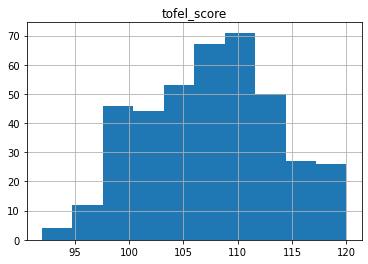

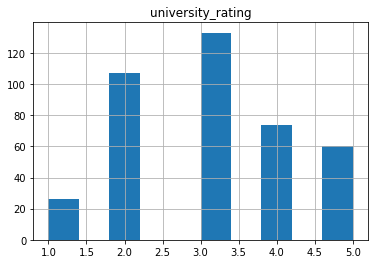

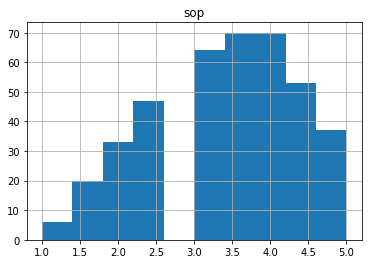

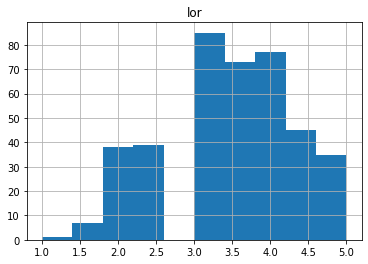

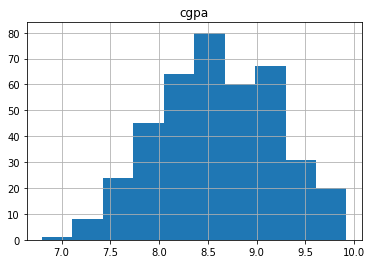

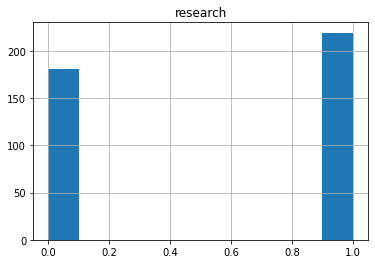

In [13]:
for f in feature_cols:
    data.hist(f);

**Data preprocessing. Including data shuffle and splitting train, validation and test dataset.**

In [14]:
def shuffle(data_frame):
     return data_frame.reindex(np.random.permutation(data_frame.index))

In [15]:
data = shuffle(data)

In [16]:
def split_training_and_test(data_frame, training_percentage):
    training_number = data_frame.shape[0] * training_percentage / 100
    test_number = data_frame.shape[0] - training_number
    return data_frame.head(int(training_number)), data_frame.tail(int(test_number))

In [17]:
training_data, test_data = split_training_and_test(data, 90)

In [18]:
training_data, validation_data = split_training_and_test(training_data, 80)

In [19]:
print(training_data.shape)
print(validation_data.shape)
print(test_data.shape)

(288, 9)
(72, 9)
(40, 9)


In [20]:
training_features = training_data[feature_cols].to_numpy()
training_labels = training_data[[target_col]].to_numpy().reshape(-1, 1)

validation_features = validation_data[feature_cols].to_numpy()
validation_labels = validation_data[[target_col]].to_numpy().reshape(-1, 1)

test_features = test_data[feature_cols].to_numpy()
test_labels = test_data[[target_col]].to_numpy().reshape(-1, 1)

In [21]:
print(training_features.shape)
print(training_labels.shape)

(288, 7)
(288, 1)


In [22]:
def train_model_and_show_result(x_train, y_train, x_val, y_val, feature_name):
    # data preprocessing for x_train and x_val.
    if x_train.ndim == 1:
        x_train = x_train.reshape(-1, 1)
    if x_val.ndim == 1:
        x_val = x_val.reshape(-1, 1)
        
    print(f"Training model for {feature_name} feature")
    regr = LinearRegression()
    regr.fit(x_train, y_train)
    
    train_score = regr.score(x_train, y_train)
    print(f"{feature_name} feature score on train dataset is {train_score}")
    val_score = regr.score(x_val, y_val)
    print(f"{feature_name} feature score on validation dataset is {val_score}")
    
    if feature_name != "all":
        val_pred = regr.predict(x_val)
    
        print(f"Plotting predictions vs. ground-truth for {feature_name} feature")
        plt.scatter(x_val, y_val, color ='b') 
        plt.plot(x_val, val_pred, color ='k')
        plt.xlabel(feature_name)
        plt.ylabel(target_col)
        plt.show()
    return regr, val_score

**Train model and plot result**
* Train model on each feature separatly.
* Train model on all features.
* Compare the result and find the best model.

Training model for gre_score feature
gre_score feature score on train dataset is 0.62523860577371
gre_score feature score on validation dataset is 0.6912972788082452
Plotting predictions vs. ground-truth for gre_score feature


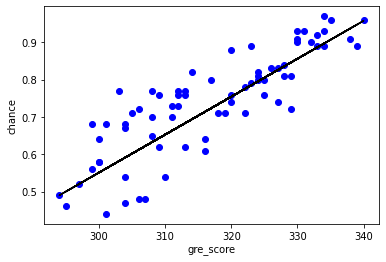

Training model for tofel_score feature
tofel_score feature score on train dataset is 0.6105205993389675
tofel_score feature score on validation dataset is 0.6630783807223867
Plotting predictions vs. ground-truth for tofel_score feature


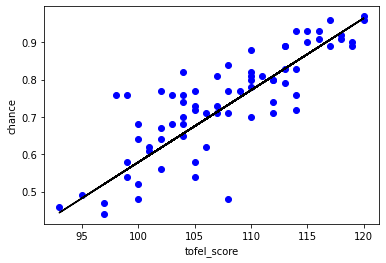

Training model for university_rating feature
university_rating feature score on train dataset is 0.4946431857552521
university_rating feature score on validation dataset is 0.6334089208403133
Plotting predictions vs. ground-truth for university_rating feature


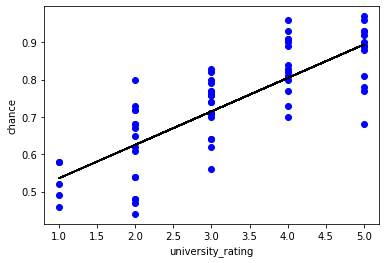

Training model for sop feature
sop feature score on train dataset is 0.4798461649745722
sop feature score on validation dataset is 0.4481613095186272
Plotting predictions vs. ground-truth for sop feature


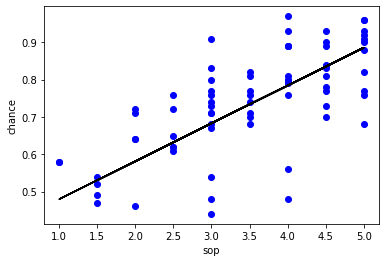

Training model for lor feature
lor feature score on train dataset is 0.4593492444471121
lor feature score on validation dataset is 0.5093489272013292
Plotting predictions vs. ground-truth for lor feature


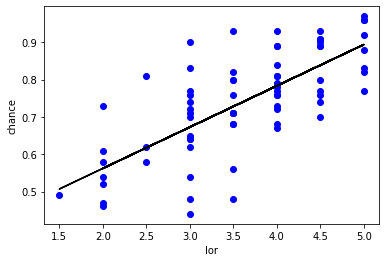

Training model for cgpa feature
cgpa feature score on train dataset is 0.7511969786002302
cgpa feature score on validation dataset is 0.8073762790593151
Plotting predictions vs. ground-truth for cgpa feature


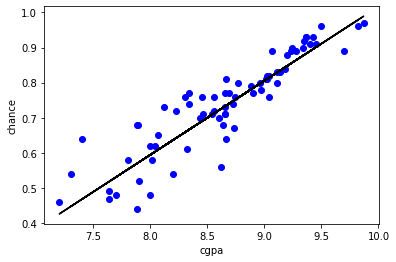

Training model for research feature
research feature score on train dataset is 0.3222104090330269
research feature score on validation dataset is 0.26345933778587616
Plotting predictions vs. ground-truth for research feature


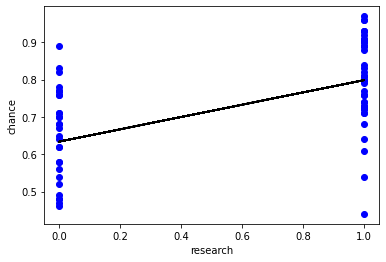

In [23]:
feat2regr = {}
feat2val_score = {}
for i in range(len(feature_cols)):
    feat2regr[feature_cols[i]], feat2val_score[feature_cols[i]] = train_model_and_show_result(
        training_features[:,i], training_labels,
        validation_features[:,i], validation_labels,
        feature_cols[i])

In [24]:
 feat2regr["all"], feat2val_score["all"] = train_model_and_show_result(
     training_features, training_labels,
     validation_features, validation_labels, "all")

Training model for all feature
all feature score on train dataset is 0.7891820997583081
all feature score on validation dataset is 0.8655586324426368


In [25]:
best_feat = max(feat2val_score.items(), key=lambda x: x[1])[0]
best_model = feat2regr[best_feat]
test_score = best_model.score(test_features, test_labels)
print(f"Best model (with {best_feat} features) score on test dataset is {test_score}")

Best model (with all features) score on test dataset is 0.7866944232090267


**Conclusion**
* From above result, we can easily see that "all features" model has the best score.